# Regularization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("../assets/csv-files/maths.csv")
dataset.head(3)

,Number1,Number2,Number3,Total Sum
0,971.844377,1760.131196,1689.181218,4421.15679
1,NaN,NaN,NaN,0.00000
2,NaN,NaN,NaN,0.00000


In [3]:
# Check for null values
dataset.isnull().sum()

Number1      454
Number2      915
Number3      931
Total Sum    499
dtype: int64

In [4]:
# Fill all the null values
for column in dataset.columns:
    dataset[column].fillna(dataset[column].mean(), inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_13840\4228950516.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].mean(), inplace=True)


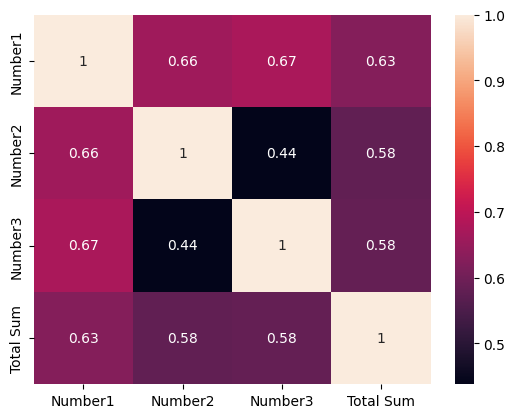

In [5]:
# For visualization
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [6]:
# Select dependent and independent variable
x = dataset.iloc[:, :-1]
y = dataset["Total Sum"]

In [7]:
# Standardize features by removing the mean and scaling to unit variance 
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)
x.head(5)

,Number1,Number2,Number3
0,1.725401,2.085984e+00,1.914268
1,0.000000,6.253358e-16,0.000000
2,0.000000,6.253358e-16,0.000000
3,0.056454,2.751673e-01,-0.566699
4,0.000000,6.253358e-16,0.000000


In [8]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

## Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.446760621328654

In [11]:
# View regression cost
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))) # Root mean squared error

645959.175595301
612.4172308121772
803.7158550105261


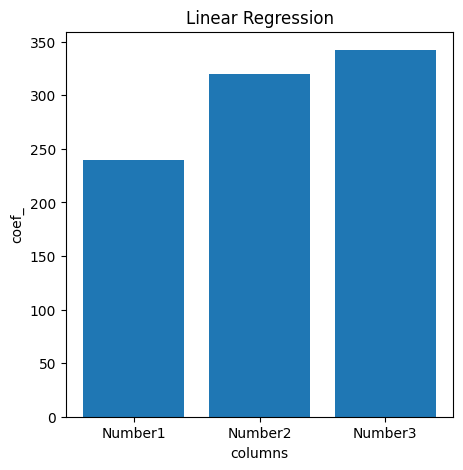

In [12]:
# Visualize linear regression
plt.figure(figsize=(5, 5))
plt.bar(x.columns, lr.coef_)
plt.title("Linear Regression")
plt.xlabel("columns")
plt.ylabel("coef_")
plt.show()

## Lasso

In [13]:
la = Lasso(alpha=0.01)
la.fit(x_train, y_train)
la.score(x_test, y_test)

0.44676136412171064

In [14]:
# View regression cost
print(mean_squared_error(y_test, la.predict(x_test)))
print(mean_absolute_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test)))) # Root mean squared error

645958.3083143211
612.4163662557999
803.7153154658191


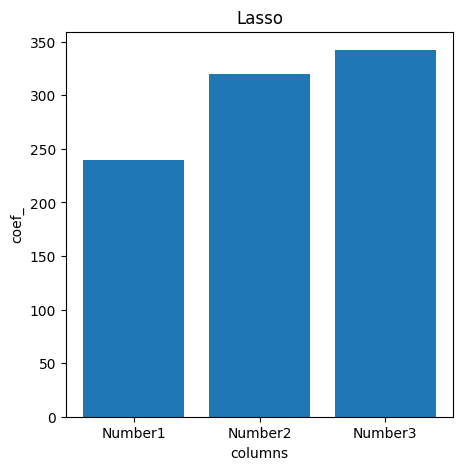

In [15]:
# Visualize Lasso
plt.figure(figsize=(5, 5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef_")
plt.show()

## Ridge

In [16]:
ri = Ridge(alpha=0.01)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)

0.4467606494026818

In [17]:
# View regression cost
print(mean_squared_error(y_test, ri.predict(x_test)))
print(mean_absolute_error(y_test, ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ri.predict(x_test)))) # Root mean squared error

645959.1428162246
612.417135710296
803.7158346183212


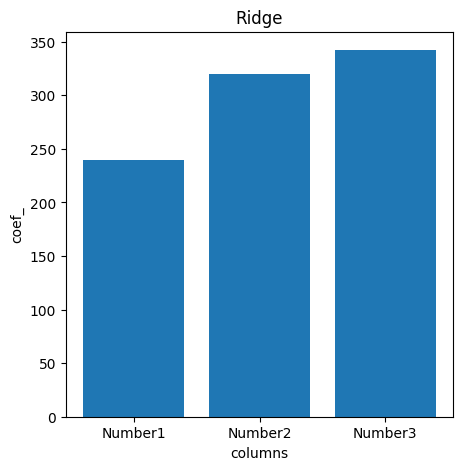

In [18]:
# Visualize Ridge
plt.figure(figsize=(5, 5))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef_")
plt.show()

In [19]:
# Compare the coef_ of regularizations using Data Frame
df = pd.DataFrame(
    {
        "Column Name": x.columns,
        "Linear Regression": lr.coef_,
        "Lasso": la.coef_,
        "Ridge": ri.coef_,
    }
)
df

,Column Name,Linear Regression,Lasso,Ridge
0,Number1,239.682717,239.697707,239.683151
1,Number2,319.776326,319.769117,319.775619
2,Number3,342.309844,342.293151,342.309026
